In [19]:
#    ======================================
#     ,-----.                              
#    '  .--./ ,---.  ,---.  ,---.,--. ,--. 
#    |  |    | .-. |(  .-' | .-. |\  '  /  
#    '  '--'\' '-' '.-'  `)| '-' ' \   '   
#     `-----' `---' `----' |  |-'.-'  /    
#                          `--'  `---'     
#    ============ Cospy  15.01 ============

#    Instructions:
#
#   Modify only the fields with label MODIFY
#   The script may not work otherwise

In [1]:
#Import python packages 
#Usually you don't need to modify (remove packages)
#However, you may need to add packages

from cospy.interface import * 
%matplotlib inline  

from IPython.display import display, HTML
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D


from sympy.interactive import printing
printing.init_printing(use_latex=True)



:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [7]:
file_path = '/Users/pablo/Research/wave33/output.h5'
h5file = h5py.File(file_path)

In [8]:
fields = list()
for k in h5file.keys():
    if k != 'coordinates':
        fields.append(k)
fields

['u']

In [9]:
nx=h5file['coordinates/x'][:,0,0].shape[0]
x_slider=widgets.IntSlider(min=0,max=nx,value=nx/2,description='X index')

ny=h5file['coordinates/y'][0,:,0].shape[0]
y_slider=widgets.IntSlider(min=0,max=ny,value=ny/2,description='Y index')

nz=h5file['coordinates/z'][0,0,:].shape[0]
z_slider=widgets.IntSlider(min=0,max=nz,value=nz/2,description='Z index')


In [10]:
frames = len(h5file[fields[0]].keys())-1
time_slider=widgets.IntSlider(min=0,max=frames,value=0,description='Time')

<function __main__.plot_timestep>

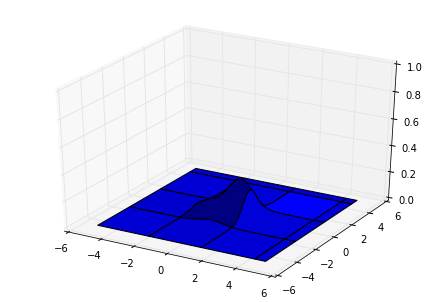

In [11]:


def plot_timestep(t, xi, yi, zi):
    fig = plt.figure()
    fig.clf()
    ax = Axes3D(fig)

    iter_time=str(t)

    X=h5file['coordinates/x'][:,:,zi]
    Y=h5file['coordinates/y'][:,:,zi]
    Z=h5file[fields[0]+'/'+iter_time][:,:,zi]

    ax.plot_surface(X, Y, Z)

    #ax.set_zlim3d(-0.5,1)
    
interact(plot_timestep, t=time_slider, xi=x_slider, yi=y_slider, zi=z_slider)